In [69]:
import os
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import math
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [70]:
dtr = pd.read_csv("TRAIN.csv")
dte = pd.read_csv("TEST.csv")

## 1. UNDERSTANDING TEST-TRAIN SPLIT

In [71]:
dtr.shape #To get dimensions of the training dataset

(614, 13)

In [72]:
dte.shape #To get dimensions of the testing dataset

(367, 12)

Inference:
13 columns of features and 614 rows of records in the train set.
12 columns of features and 367 rows of records in the test set. 
In total, 981 records combining both, representing a train-test-split of approx 63% and 37%. 
The features are similar in the test set as the train data except the Loan_Status. 
We will predict the Loan_Status using the model built using the train data.

## 2. EDA - TRAINING DATASET

In [73]:
dtr.head() #To get a gist of first 5 columns of the training dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [74]:
dtr.columns #To get names of columns of the dataset

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [75]:
#we can drop it because it is not contributing in the analysis
dtr = dtr.drop(['Loan_ID'], axis = 1) 
dte = dte.drop(['Loan_ID'], axis = 1) 

In [76]:
dtr.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

## 2.1 Understanding Features & Target Variable (Univariate Analysis)

For categorical variables, we can use frequency table or bar plots to get count of each category in a particular variable. 
For numerical variables, a histogram or a box-plot can be used to look at the distribution of the variable. 
With a histogram, we can check the central tendency, variability, modality, and kurtosis of a distribution but it can’t show if the data has any outliers. Therefore, box-plots can be used in such a scenario.

In [77]:
dtr['Gender'].value_counts() #1

Male      489
Female    112
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

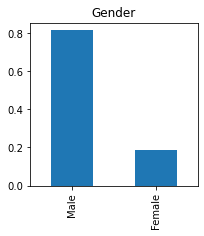

In [78]:
dtr['Gender'].value_counts(normalize=True).plot.bar(figsize=(3,3), title='Gender')

In [79]:
dtr['Married'].value_counts() #2

Yes    398
No     213
Name: Married, dtype: int64

<AxesSubplot:title={'center':'Married'}>

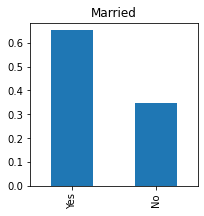

In [80]:
dtr['Married'].value_counts(normalize=True).plot.bar(figsize=(3,3), title='Married')

In [81]:
dtr['Education'].value_counts() #3

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

<AxesSubplot:title={'center':'Education'}>

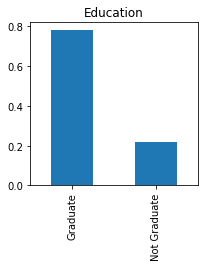

In [82]:
dtr['Education'].value_counts(normalize=True).plot.bar(figsize=(3,3), title='Education')

In [83]:
dtr['Self_Employed'].value_counts() #4

No     500
Yes     82
Name: Self_Employed, dtype: int64

<AxesSubplot:title={'center':'Self_Employed'}>

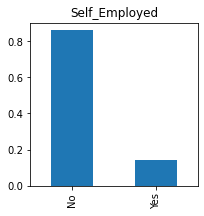

In [84]:
dtr['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(3,3), title='Self_Employed')

In [85]:
dtr['Credit_History'].value_counts() #5

1.0    475
0.0     89
Name: Credit_History, dtype: int64

<AxesSubplot:title={'center':'Credit_History'}>

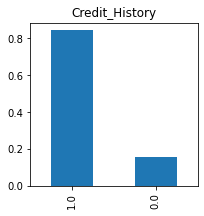

In [86]:
dtr['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(3,3), title='Credit_History')

In [87]:
dtr['Property_Area'].value_counts() #6

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

<AxesSubplot:title={'center':'Property_Area'}>

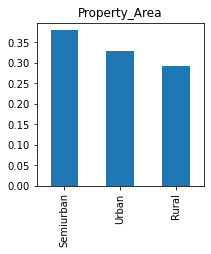

In [88]:
dtr['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(3,3), title='Property_Area')

In [89]:
dtr['Dependents'].value_counts() #7

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Dependents'}>

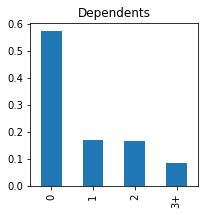

In [90]:
dtr['Dependents'].value_counts(normalize=True).plot.bar(figsize=(3,3), title='Dependents')

In [91]:
dtr['Loan_Amount_Term'].describe() #8

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot:title={'center':'Loan_Amount_Term Proportions'}>

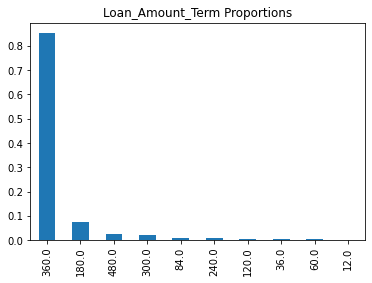

In [92]:
dtr['Loan_Amount_Term'].value_counts(normalize=True).plot.bar(title= 'Loan_Amount_Term Proportions')

In [93]:
dtr['ApplicantIncome'].describe() #9

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

C:\Users\jay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


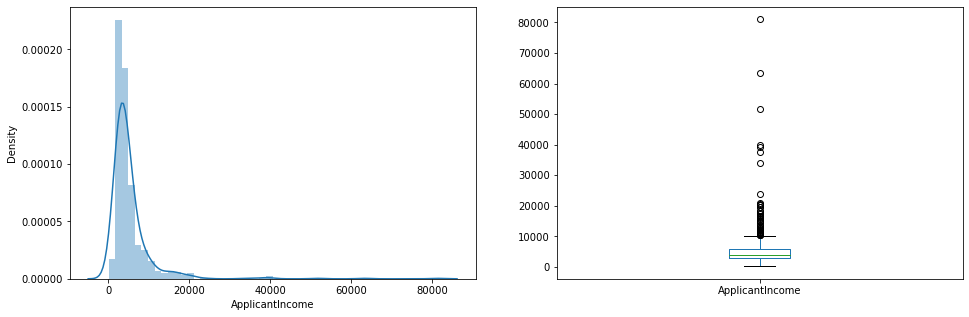

In [94]:
plt.subplot(121)
sn.distplot(dtr['ApplicantIncome']);

plt.subplot(122)
dtr['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [95]:
dtr['CoapplicantIncome'].describe() #10

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

C:\Users\jay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


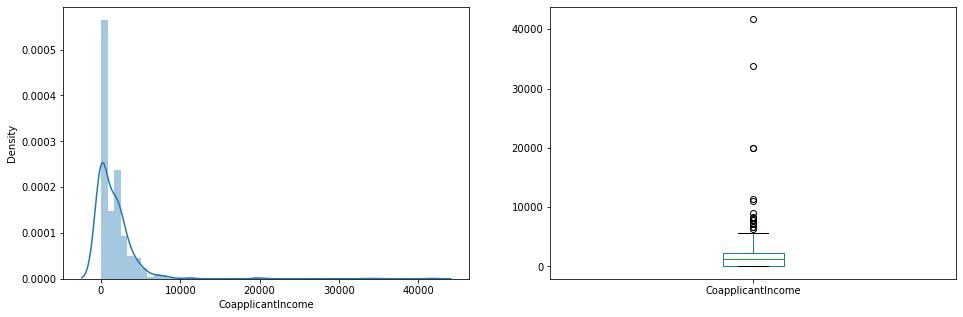

In [96]:
plt.subplot(121)
sn.distplot(dtr['CoapplicantIncome']);

plt.subplot(122)
dtr['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

In [97]:
dtr['LoanAmount'].describe() #11

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

C:\Users\jay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


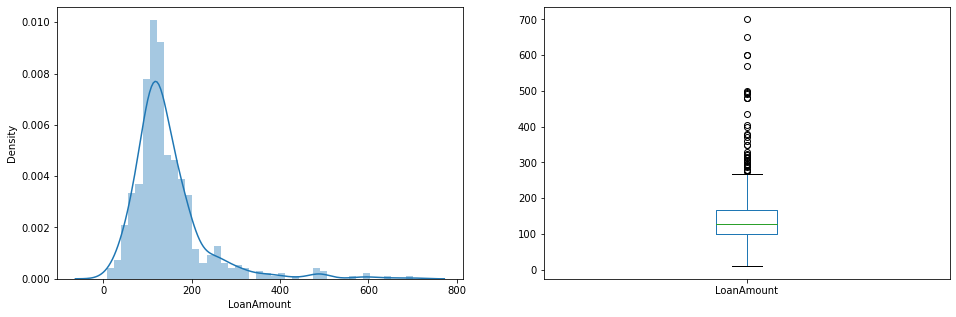

In [98]:
plt.subplot(121)
sn.distplot(dtr['LoanAmount']);

plt.subplot(122)
dtr['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

In [99]:
dtr['Loan_Status'].value_counts(normalize=True) # 12 (Loan status in proportions)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

Out of total applications, 68.72% loans were approved. This is an imbalanced dataset where accuracy as an evaluation metric cannot be appropriate. Thus, for imbalanced or skewed classes, we should use "precision" and "recall" as evaluation metrics.

## 2.2 Understanding Relationships (Bivariate Analysis)

Let us understand the relationship in between Income and Education.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

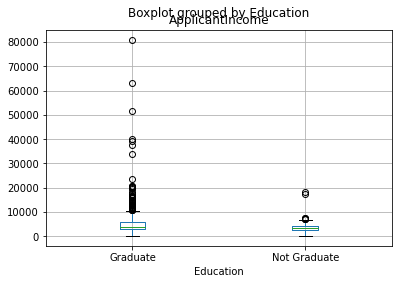

In [100]:
dtr.boxplot(column='ApplicantIncome', by='Education') 

We can see that there is no substantial in between the median income of graduate and non-graduates. However, this confirms that people who are graduates have higher incomes.

In [101]:
pd.crosstab(dtr['Gender'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Gender,,
Female,33.035714,66.964286
Male,30.674847,69.325153


In [102]:
pd.crosstab(dtr['Married'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Married,,
No,37.089202,62.910798
Yes,28.391960,71.608040


In [103]:
pd.crosstab(dtr['Education'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Education,,
Graduate,29.166667,70.833333
Not Graduate,38.805970,61.194030


In [104]:
pd.crosstab(dtr['Self_Employed'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Self_Employed,,
No,31.400000,68.600000
Yes,31.707317,68.292683


In [105]:
pd.crosstab(dtr['Property_Area'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Property_Area,,
Rural,38.547486,61.452514
Semiurban,23.175966,76.824034
Urban,34.158416,65.841584


In [106]:
pd.crosstab(dtr['Credit_History'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Credit_History,,
0.0,92.134831,7.865169
1.0,20.421053,79.578947


In [107]:
pd.crosstab(dtr['Dependents'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Dependents,,
0,31.014493,68.985507
1,35.294118,64.705882
2,24.752475,75.247525
3+,35.294118,64.705882


In [108]:
dtr['Total_Income'] = dtr['ApplicantIncome'] + dtr['CoapplicantIncome']

print(dtr['Total_Income'].describe())

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64


In [109]:
# making bins for Total Income variable
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Too High']
dtr['Total_Income_bin'] = pd.cut(dtr['Total_Income'],bins,labels=group)

In [110]:
dtr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Total_Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,Too High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,High
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,High


In [111]:
pd.crosstab(dtr['Total_Income_bin'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
Total_Income_bin,,
Low,58.333333,41.666667
Average,26.890756,73.109244
High,29.017857,70.982143
Too High,32.793522,67.206478


In [112]:
dtr['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [113]:
# making bins for Total Income variable
bins = [0,200,450,700]
group = ['Low','Average','High']
dtr['LoanAmount_bin'] = pd.cut(dtr['LoanAmount'],bins,labels=group)

In [114]:
pd.crosstab(dtr['LoanAmount_bin'],dtr['Loan_Status']).apply(lambda r: 100*r/r.sum(), axis=1)

Loan_Status,N,Y
LoanAmount_bin,,
Low,29.296875,70.703125
Average,39.705882,60.294118
High,33.333333,66.666667


In [115]:
dtr = dtr.drop(['LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

## 2.3 Missing Value Inputation

In [116]:
# To check the presence of missing values (completeness)
print(dtr.isnull().sum()) , print(dte.isnull().sum())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


(None, None)

In [117]:
# calculate the median value for LoanAmount
print(np.nanmedian(dtr["LoanAmount"]))
dtr['LoanAmount'].fillna(value = 128.0, inplace = True)

128.0


In [118]:
# filling in the missing value for Loan_Amount_Term
dtr['Loan_Amount_Term'].fillna(dtr['Loan_Amount_Term'].mean(),inplace=True)

# Replace missing value of Categorical Variables with more frequent category
dtr['Gender'].fillna(dtr['Gender'].mode()[0],inplace=True)

# Impute missing values for Married
dtr['Married'].fillna(dtr['Married'].mode()[0],inplace=True)

# Impute missing values for Dependents
dtr['Dependents'].fillna(dtr['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
dtr['Credit_History'].fillna(dtr['Credit_History'].mode()[0],inplace=True)

# Impute missing values for Self_Employed
dtr['Self_Employed'].fillna(dtr['Self_Employed'].mode()[0],inplace=True)

In [119]:
# Replace missing value of Categorical Variables with more frequent category
dte['Gender'].fillna(dtr['Gender'].mode()[0],inplace=True)

# Impute missing values for Self_Employed
dte['Self_Employed'].fillna(dtr['Self_Employed'].mode()[0],inplace=True)

# Impute missing values for Dependents
dte['Dependents'].fillna(dtr['Dependents'].mode()[0],inplace=True)

# Impute missing values for Credit_History
dte['Credit_History'].fillna(dtr['Credit_History'].mode()[0],inplace=True)

# filling in the missing value for Loan_Amount_Term
dte['Loan_Amount_Term'].fillna(dtr['Loan_Amount_Term'].mean(),inplace=True)

# calculate the median value for LoanAmount
dte['LoanAmount'].fillna(value = 128.0, inplace = True)

In [120]:
print(dtr.isnull().sum()) , print(dte.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


(None, None)

## 2.4 Duplicacy Check

In [121]:
# To check the presence of duplicate data (uniqueness)
dup = dtr.duplicated()
dtr[dup].sum()

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

## 2.5 Check for Correlation

In [122]:
# Computing pair-wise correlation coefficient matrix
dtr.corr = dtr.corr(method='pearson', min_periods=1) 
# where, min_periods means min no. of obs required per pair of columns to have a valid result.

<AxesSubplot:>

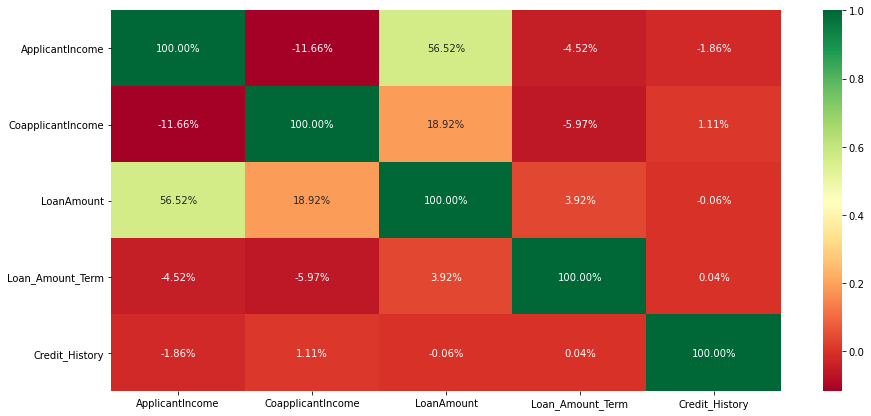

In [123]:
# Visualizing correlation of features
plt.figure(figsize = (15, 7))
sn.heatmap(dtr.corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')

(ApplicantIncome and LoanAmount) with correlation coefficient of 0.56
(Credit_History and Loan_Status) with correlation coefficient of 0.54
(CoapplicantIncome and LoanAmount) with correlation coefficient of 0.19

## 2.6 Outlier Detection

In [129]:
dtr['Dependents'] = dtr['Dependents'].replace('3+','3')
dte['Dependents'] = dte['Dependents'].replace('3+','3')

In [125]:
# Removing skewness in LoanAmount variable by log transformation
dtr['LoanAmount_log'] = np.log(dtr['LoanAmount'])
dte['LoanAmount_log'] = np.log(dte['LoanAmount'])

C:\Users\jay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


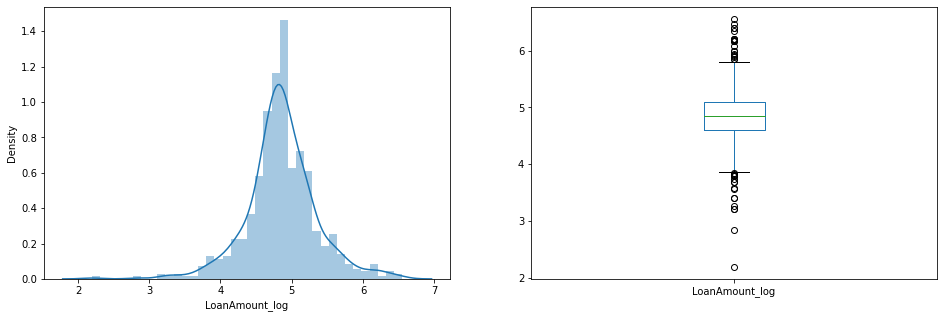

In [126]:
plt.subplot(121)
sn.distplot(dtr['LoanAmount_log']);

plt.subplot(122)
dtr['LoanAmount_log'].plot.box(figsize=(16,5))

plt.show()

In [128]:
dtr.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
LoanAmount_log       float64
dtype: object

## 3. MODEL BUILDING (LOGISTIC REGRESSION)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.

STEP 1: Droping "Loan_Status" from tarining set (dtr) to create a new set without it, named as "x".
        Assigning "Loan_Status" to target variable.

In [130]:
x = dtr.drop('Loan_Status', 1)
y = dtr.Loan_Status

STEP 2: Encoding training set, test set and the dataet without "Loan_Status" column.

In [131]:
dtr = pd.get_dummies(dtr)
dte = pd.get_dummies(dte)
x = pd.get_dummies(x)

In [132]:
x.shape, dtr.shape, dte.shape

((614, 21), (614, 23), (367, 21))

In [133]:
x.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,4.852030,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,4.852030,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,4.189655,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,4.787492,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,4.948760,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1


STEP 3: We will use the "train_test_split function" from "sklearn" to divide our train dataset. 
        So, first let us import train_test_split.

In [134]:
# import library
from sklearn.model_selection import train_test_split

# split the data into train and cross validation set
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.3, random_state=0)

In [135]:
# take a look at the dimension of the data
x_train.shape, x_cv.shape, y_train.shape, y_cv.shape

((429, 21), (185, 21), (429,), (185,))

In [136]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

Prediction of the "Loan_Status" for validation set (x_cv).

In [139]:
# make prediction
pred_cv = model.predict(x_cv)

## 4. Model Evaluation

4.1 CONFUSION MATRIX & ACCURACY

[[ 22  29]
 [  2 132]]


Text(33.0, 0.5, 'True')

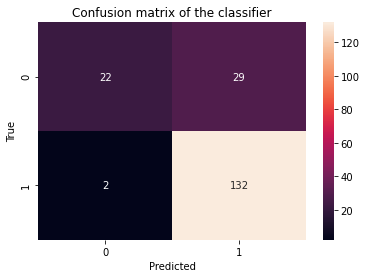

In [142]:
# import confusion_matrix
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_cv, pred_cv)
print(cm)

# f, ax = plt.subplots(figsize=(9, 6))
sn.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
TP = 22, FN = 29, FP = 2 and TN = 132.
Thus, out of 185 cases, (132+22)/(185) = 83.24% are classified accurately.

In [140]:
# calculate accuracy score
accuracy_score(y_cv, pred_cv)

0.8324324324324325

So our predictions are over 83% accurate, i.e. we have identified 83% of the loan status correctly.

4.2 PRECISION & RECALL

Here, our aim is to identify the applications who are genuinely eligible for loan approval. We want the right predictions so as to avoid the scenario of our client "Dream Housing Finance" bearing any loss due to non-repayment of loan.
Thus, let us understand if we are concerned with precision, recall or both.

Precision says, of all applicants who are approved for loan by the model, how many are actually eligible.
Recall says, of all applicants who are eligible for loan approval, how many actually got approved by the model.

Thus, we are interested in high precision as low precision would imply the wrong applicant may be chosen. Whereas, low precision would imply a genuine eligible applicant not getting loan approval. But the cost of granting a loan to a wrong applicant is more in this case.

In [143]:
# import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_cv, pred_cv))

              precision    recall  f1-score   support

           N       0.92      0.43      0.59        51
           Y       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



The performance of our model seems encouraging, with accuracy of 83%, precision of 82% and recall of 99%.

# 5. Model Prediction

In [144]:
# make prediction on test set
pred_dte = model.predict(dte)

In [145]:
# take a look at the prediction
pred_dte[:50]

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y'],
      dtype=object)

Importing Prediction File.

In [ ]:
output = pd.read_csv("Prediction.csv")

In [ ]:
# fill the Loan_ID and Loan_Status
output['Loan_Status'] = pred_dte
output['Loan_ID'] = test_original['Loan_ID']

In [ ]:
# convert to CSV file, without row index
output.to_csv('testresult.csv', index=False)